In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
liver_df=pd.read_csv("indian_liver_patient.csv")
liver_df.drop('Gender',axis=1,inplace=True)
liver_df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


In [4]:
liver_df.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
liver_df.describe(include="all")

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
liver_df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


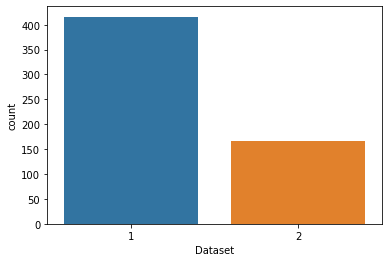

In [7]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD,NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [8]:
liver_df=pd.get_dummies(liver_df,drop_first=True)
liver_df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())


In [10]:
liver_df.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [11]:
import seaborn as sns

In [12]:
X = liver_df.drop(['Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89


In [13]:
y=liver_df['Dataset']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

### Different Correlation methods 

In [14]:
liver_df.corr(method='pearson')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


In [15]:
liver_df.corr(method='kendall')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.078099,0.074733,0.038868,-0.046261,-0.013206,-0.120690,-0.180176,-0.177241,-0.107040
Total_Bilirubin,0.078099,1.000000,0.898136,0.270267,0.306483,0.361626,-0.014417,-0.153281,-0.203865,-0.255635
Direct_Bilirubin,0.074733,0.898136,1.000000,0.265809,0.292416,0.364823,-0.015559,-0.164638,-0.219255,-0.256279
Alkaline_Phosphotase,0.038868,0.270267,0.265809,1.000000,0.277939,0.264168,0.010076,-0.115934,-0.227519,-0.223921
Alamine_Aminotransferase,-0.046261,0.306483,0.292416,0.277939,1.000000,0.596488,-0.012909,-0.033134,-0.055798,-0.239269
Aspartate_Aminotransferase,-0.013206,0.361626,0.364823,0.264168,0.596488,1.000000,-0.057158,-0.137458,-0.145771,-0.253705
Total_Protiens,-0.120690,-0.014417,-0.015559,0.010076,-0.012909,-0.057158,1.000000,0.613098,0.192220,0.026685
Albumin,-0.180176,-0.153281,-0.164638,-0.115934,-0.033134,-0.137458,0.613098,1.000000,0.592980,0.138960
Albumin_and_Globulin_Ratio,-0.177241,-0.203865,-0.219255,-0.227519,-0.055798,-0.145771,0.192220,0.592980,1.000000,0.158967
Dataset,-0.107040,-0.255635,-0.256279,-0.223921,-0.239269,-0.253705,0.026685,0.138960,0.158967,1.000000


In [16]:
liver_df.corr(method='spearman')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.113827,0.106473,0.059205,-0.067737,-0.018285,-0.174271,-0.260791,-0.249505,-0.129572
Total_Bilirubin,0.113827,1.000000,0.959216,0.383794,0.436586,0.508869,-0.019252,-0.222184,-0.284200,-0.303879
Direct_Bilirubin,0.106473,0.959216,1.000000,0.367818,0.412322,0.504138,-0.019987,-0.232664,-0.297338,-0.297270
Alkaline_Phosphotase,0.059205,0.383794,0.367818,1.000000,0.410752,0.395732,0.014028,-0.170809,-0.321095,-0.273247
Alamine_Aminotransferase,-0.067737,0.436586,0.412322,0.410752,1.000000,0.773611,-0.018811,-0.052673,-0.082942,-0.290709
Aspartate_Aminotransferase,-0.018285,0.508869,0.504138,0.395732,0.773611,1.000000,-0.084779,-0.204867,-0.208809,-0.308897
Total_Protiens,-0.174271,-0.019252,-0.019987,0.014028,-0.018811,-0.084779,1.000000,0.779077,0.272490,0.032220
Albumin,-0.260791,-0.222184,-0.232664,-0.170809,-0.052673,-0.204867,0.779077,1.000000,0.751223,0.167079
Albumin_and_Globulin_Ratio,-0.249505,-0.284200,-0.297338,-0.321095,-0.082942,-0.208809,0.272490,0.751223,1.000000,0.187377
Dataset,-0.129572,-0.303879,-0.297270,-0.273247,-0.290709,-0.308897,0.032220,0.167079,0.187377,1.000000


albumin_and_globulin_ratio,albumin,total_protiens,age,alkaline_phosphotase,alamine_aminotransferase,total_bilurubin,asparate_aminotransferase,direct_bilurubin,

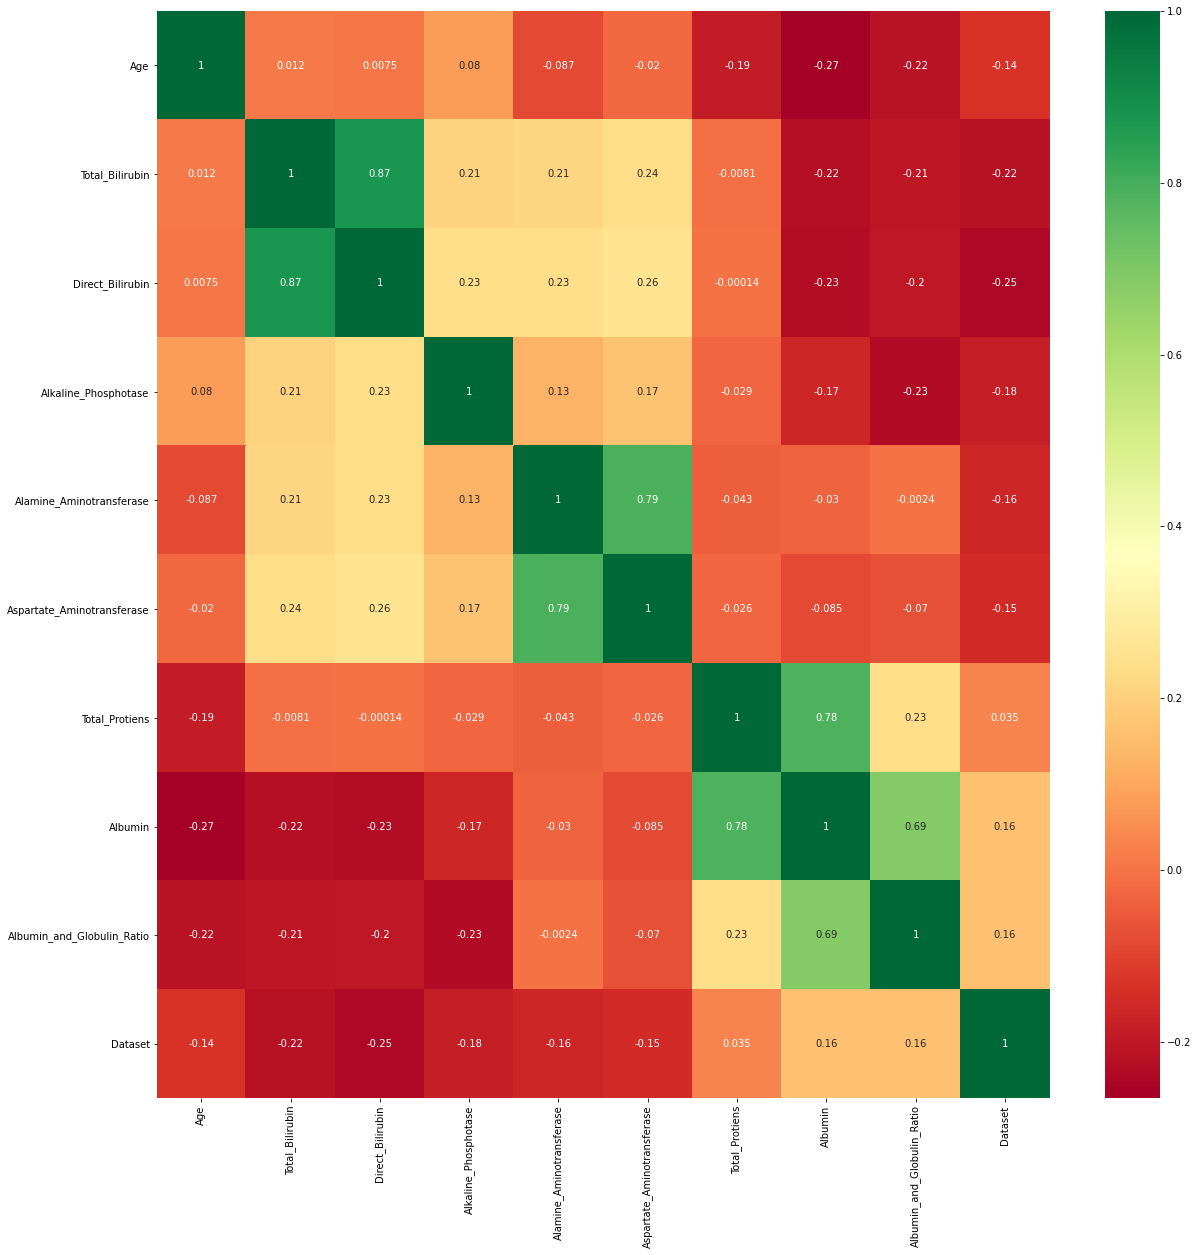

In [32]:
cormat=liver_df.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,20))

# color indicators for correlation
#dark green says highly correlated whereas red says negatively correlated
#for each features
g=sns.heatmap(liver_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

we can observe all linear related features as discussed above so as Direct_Bilirubin has more neagtive correlation with output we will remove it

In [18]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
finX = liver_df[['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
finXscaled,yscaled = sm.fit_resample(finX,y)
X_train, X_test, y_train, y_test = train_test_split(finXscaled, yscaled,test_size=0.30,stratify=yscaled)

In [20]:
# K-Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train,y_train)
knn_predicted = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score_test = round(knn.score(X_test, y_test) * 100, 2)
print('K-Nearest Neighbours Score: \n', knn_score)
print('K-Nearest Neighbours Test Score: \n', knn_score_test)
print('Accuracy: \n', accuracy_score(y_test,knn_predicted))
print('\nConfusion matrix:')
print(confusion_matrix(y_test,knn_predicted))
print('\nClassification Report:')
print(classification_report(y_test,knn_predicted))

K-Nearest Neighbours Score: 
 71.13
K-Nearest Neighbours Test Score: 
 72.4
Accuracy: 
 0.724

Confusion matrix:
[[ 71  54]
 [ 15 110]]

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.57      0.67       125
           2       0.67      0.88      0.76       125

    accuracy                           0.72       250
   macro avg       0.75      0.72      0.72       250
weighted avg       0.75      0.72      0.72       250



In [21]:
# Decision Tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_predicted = dtree.predict(X_test)
dtree_score = round(dtree.score(X_train, y_train) * 100, 2)
dtree_score_test = round(dtree.score(X_test, y_test) * 100, 2)
print('Decision Tree Score: \n', dtree_score)
print('Decision Tree Test Score: \n', dtree_score_test)
print('Accuracy: \n', accuracy_score(y_test,dtree_predicted))
print('\nConfusion matrix:')
print(confusion_matrix(y_test,dtree_predicted))
print('\nClassification Report:')
print(classification_report(y_test,dtree_predicted))

Decision Tree Score: 
 100.0
Decision Tree Test Score: 
 65.6
Accuracy: 
 0.656

Confusion matrix:
[[85 40]
 [46 79]]

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.68      0.66       125
           2       0.66      0.63      0.65       125

    accuracy                           0.66       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.66      0.66      0.66       250



In [22]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print('\nConfusion matrix:')
print(confusion_matrix(y_test,rf_predicted))
print('\nClassification Report:')
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 80.4
Accuracy: 
 0.804

Confusion matrix:
[[ 89  36]
 [ 13 112]]

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.71      0.78       125
           2       0.76      0.90      0.82       125

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250



In [23]:
# Support Vector Machine

svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
svm_predicted = svm.predict(X_test)
svm_score = round(svm.score(X_train, y_train) * 100, 2)
svm_score_test = round(svm.score(X_test, y_test) * 100, 2)
print('Support Vector Machine Score: \n', svm_score)
print('Support Vector Machine Test Score: \n', svm_score_test)
print('Accuracy: \n', accuracy_score(y_test,svm_predicted))
print('\nConfusion matrix:')
print(confusion_matrix(y_test,svm_predicted))
print('\nClassification Report:')
print(classification_report(y_test,svm_predicted))

Support Vector Machine Score: 
 70.62
Support Vector Machine Test Score: 
 72.0
Accuracy: 
 0.72

Confusion matrix:
[[ 65  60]
 [ 10 115]]

Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.52      0.65       125
           2       0.66      0.92      0.77       125

    accuracy                           0.72       250
   macro avg       0.76      0.72      0.71       250
weighted avg       0.76      0.72      0.71       250



In [24]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('\nConfusion matrix:')
print(confusion_matrix(y_test,log_predicted))
print('\nClassification Report:')
print(classification_report(y_test,log_predicted))

Logistic Regression Training Score: 
 70.62
Logistic Regression Test Score: 
 70.4
Accuracy: 
 0.704

Confusion matrix:
[[ 74  51]
 [ 23 102]]

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.59      0.67       125
           2       0.67      0.82      0.73       125

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



C:\Users\dugga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Perceptron

per=Perceptron(tol=1e-3, random_state=0)
per.fit(X_train,y_train)
per_predicted= per.predict(X_test)
per_score = round(per.score(X_train, y_train) * 100, 2)
per_score_test = round(per.score(X_test, y_test) * 100, 2)
print('PerceptronPerceptron Score: \n', per_score)
print('Perceptron Test Score: \n', per_score_test)
print('Accuracy: \n', accuracy_score(y_test,per_predicted))
print('\nConfusion matrix:')
print(confusion_matrix(y_test,per_predicted))
print('\nClassification Report:')
print(classification_report(y_test,per_predicted))

PerceptronPerceptron Score: 
 50.17
Perceptron Test Score: 
 50.8
Accuracy: 
 0.508

Confusion matrix:
[[123   2]
 [121   4]]

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.98      0.67       125
           2       0.67      0.03      0.06       125

    accuracy                           0.51       250
   macro avg       0.59      0.51      0.36       250
weighted avg       0.59      0.51      0.36       250



In [40]:
# adaboost classifier

adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
adb_predicted= adb.predict(X_test)
adb_score = round(adb.score(X_train, y_train) * 100, 2)
adb_score_test = round(adb.score(X_test, y_test) * 100, 2)
print('Adaboost Score: \n', adb_score)
print('Adaboost Test Score: \n', adb_score_test)
print('Accuracy: \n', accuracy_score(y_test,adb_predicted))
print('\nConfusion matrix:')
print(confusion_matrix(y_test,adb_predicted))
print('\nClassification Report:')
print(classification_report(y_test,adb_predicted))

Adaboost Score: 
 84.02
Adaboost Test Score: 
 74.0
Accuracy: 
 0.74

Confusion matrix:
[[ 80  45]
 [ 20 105]]

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.64      0.71       125
           2       0.70      0.84      0.76       125

    accuracy                           0.74       250
   macro avg       0.75      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250



In [41]:
#We can now rank our evaluation of all the models to choose the best ones among the models for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'K Nearest Neighbours','Random Forest', 'Support Vector Machine','ADABoost Classifier','Perceptron','Decision Tree'],
    'Score': [ logreg_score, knn_score, random_forest_score, svm_score, adb_score, per_score, dtree_score],
    'Test Score': [ logreg_score_test, knn_score_test, random_forest_score_test, svm_score_test, adb_score_test, per_score_test, dtree_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Random Forest,100.00,80.4
4,ADABoost Classifier,84.02,74.0
1,K Nearest Neighbours,71.13,72.4
3,Support Vector Machine,70.62,72.0
0,Logistic Regression,70.62,70.4
6,Decision Tree,100.00,65.6
5,Perceptron,50.17,50.8


Index(['Logistic Regression', 'K Nearest Neighbours', 'Random Forest',
       'Support Vector Machine', 'ADABoost Classifier', 'Perceptron',
       'Decision Tree'],
      dtype='object', name='Model')


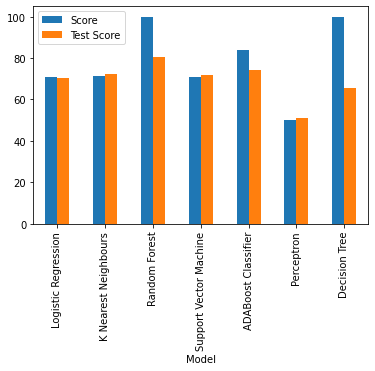

In [47]:
models.plot(kind='bar')
#print(models.index)
models.set_index(models['Model'], inplace=True)
print(models.index)
plt.show()

In [28]:
import pickle
pickle.dump(adb, open("smote_adb.pickle", "wb"))
pickle.dump(dtree, open("smote_DecisionTree.pickle", "wb"))
pickle.dump(random_forest, open("smote_RandomForest.pickle", "wb"))
pickle.dump(svm, open("smote_SVM.pickle", "wb"))
pickle.dump(logreg, open("smote_Logistic.pickle", "wb"))

In [29]:
adb_Model = pickle.load(open('smote_adb.pickle','rb'))
dtree_Model = pickle.load(open('smote_DecisionTree.pickle','rb'))
randomforest_Model = pickle.load(open('smote_RandomForest.pickle','rb'))
SVM_Model = pickle.load(open('smote_SVM.pickle','rb'))
logreg_Model = pickle.load(open('smote_Logistic.pickle','rb'))

In [30]:
a=b=0
act=list(y_test)
arr=X_test.to_numpy()
for i in range(len(act)):
    d=0
    pred=act[i]
    sdata=arr[i]
    predictionOfadbModel = adb_Model.predict(pd.DataFrame(columns=['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'], data = np.array([arr[i][0],arr[i][1],arr[i][2],arr[i][3],arr[i][4],arr[i][5],arr[i][6],arr[i][7]]).reshape(1,8)))
    predictionOfdtreeModel = dtree_Model.predict(pd.DataFrame(columns=['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'], data = np.array([arr[i][0],arr[i][1],arr[i][2],arr[i][3],arr[i][4],arr[i][5],arr[i][6],arr[i][7]]).reshape(1,8)))
    predictionOfrandomforestModel = randomforest_Model.predict(pd.DataFrame(columns=['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'], data = np.array([arr[i][0],arr[i][1],arr[i][2],arr[i][3],arr[i][4],arr[i][5],arr[i][6],arr[i][7]]).reshape(1,8)))
    predictionOfSVMModel = SVM_Model.predict(pd.DataFrame(columns=['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'], data = np.array([arr[i][0],arr[i][1],arr[i][2],arr[i][3],arr[i][4],arr[i][5],arr[i][6],arr[i][7]]).reshape(1,8)))
    predictionOflogregModel = logreg_Model.predict(pd.DataFrame(columns=['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'], data = np.array([arr[i][0],arr[i][1],arr[i][2],arr[i][3],arr[i][4],arr[i][5],arr[i][6],arr[i][7]]).reshape(1,8)))
    if pred==predictionOfadbModel[0]:
        d+=1
    if pred==predictionOfdtreeModel[0]:
        d+=1
    if pred==predictionOfrandomforestModel[0]:
        d+=1
    if pred==predictionOfSVMModel[0]:
        d+=1
    if pred==predictionOflogregModel[0]:
        d+=1
    if d>=2:
        a+=1
    else:
        b+=1
print(a,b)
print("Total accuracy on testing data:")
print(a/len(act))

209 41
Total accuracy on testing data:
0.836
